### Introduction 

### Partie I Préparation des données 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Charger le dataset 
file_path = "Data/flight_data_2018_to_2022.csv"
df = pd.read_csv(file_path)
# Afficher les informations générales
df.info(10)

C:\Users\jeann\AppData\Local\Temp\ipykernel_9132\1709735481.py:3: DtypeWarning: Columns (11,13,78,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Data columns (total 120 columns):
 #    Column                                              Dtype  
---   ------                                              -----  
 0    Year                                                int64  
 1    Quarter                                             int64  
 2    Month                                               int64  
 3    DayofMonth                                          int64  
 4    DayOfWeek                                           int64  
 5    FlightDate                                          object 
 6    Marketing_Airline_Network                           object 
 7    Operated_or_Branded_Code_Share_Partners             object 
 8    DOT_ID_Marketing_Airline                            int64  
 9    IATA_Code_Marketing_Airline                         object 
 10   Flight_Number_Marketing_Airline                     int64  
 11   Originally_Scheduled_Cod

In [5]:
# Afficher un aperçu du dataset
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [7]:
# Identifier les types de données
print("Types de données :")
print(df.dtypes)

Types de données :
Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Duplicate            object
Unnamed: 119        float64
Length: 120, dtype: object


In [10]:
print(f"Le DataFrame contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Le DataFrame contient 563737 lignes et 120 colonnes.


In [11]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0], "\n")

Valeurs manquantes par colonne :
Originally_Scheduled_Code_Share_Airline               563720
DOT_ID_Originally_Scheduled_Code_Share_Airline        563720
IATA_Code_Originally_Scheduled_Code_Share_Airline     563720
Flight_Num_Originally_Scheduled_Code_Share_Airline    563720
Tail_Number                                            10568
                                                       ...  
Div5TotalGTime                                        563737
Div5LongestGTime                                      563737
Div5WheelsOff                                         563737
Div5TailNum                                           563737
Unnamed: 119                                          563737
Length: 75, dtype: int64 



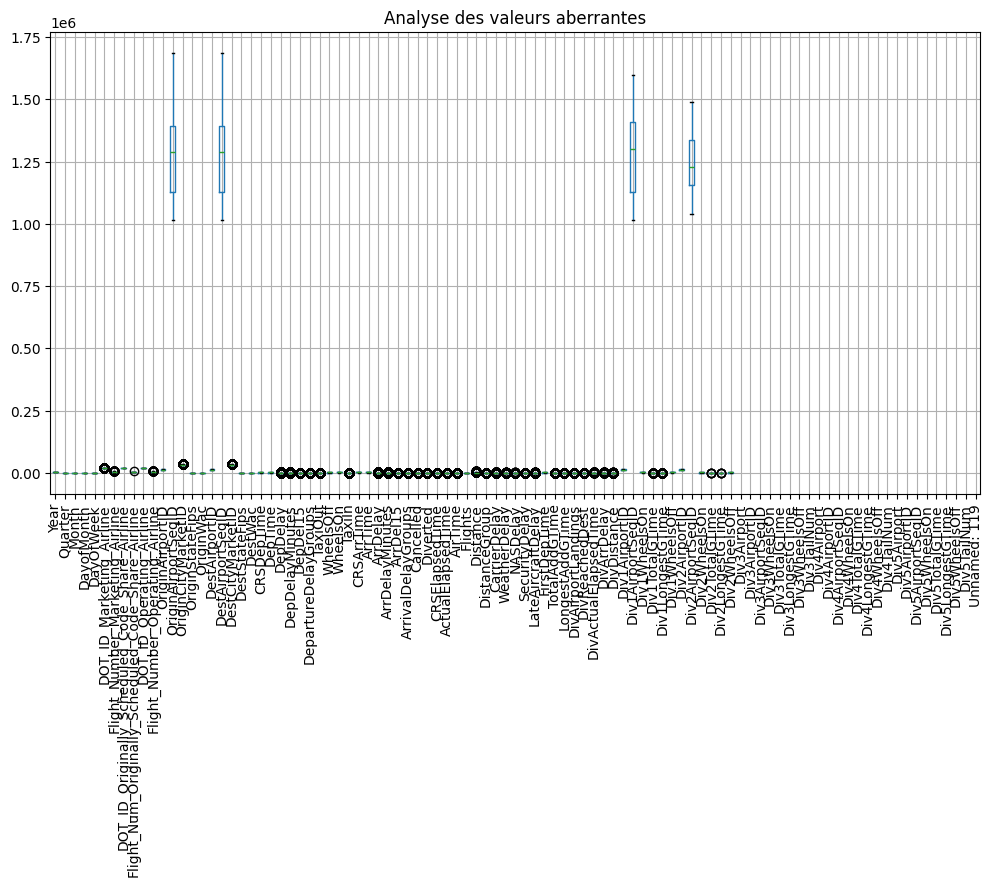

Nombre de doublons : 0


In [12]:
# Détection des valeurs aberrantes pour les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=90)  
plt.title("Analyse des valeurs aberrantes")
plt.show()

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())

In [13]:

# Séparer les variables numériques et catégorielles
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Afficher les résultats
print(f"Variables numériques ({len(num_features)}): \n{num_features}\n")
print(f"Variables catégorielles ({len(cat_features)}): \n{cat_features}")


Variables numériques (95): 
['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Originally_Scheduled_Code_Share_Airline', 'Flight_Num_Originally_Scheduled_Code_Share_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime', 'LongestAddGTime', 'DivAirportLandings', 'DivRea

In [14]:
# Supprimer la colonne FlightDate car elle est redondante avec Year, Month, etc.
df.drop(columns=['FlightDate'], inplace=True)

# Encodage One-Hot pour les variables avec peu de catégories
df = pd.get_dummies(df, columns=['DepTimeBlk', 'ArrTimeBlk', 'CancellationCode'], drop_first=True)

# Encodage Label pour certaines variables catégorielles
label_cols = ['Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
              'IATA_Code_Marketing_Airline', 'Originally_Scheduled_Code_Share_Airline',
              'IATA_Code_Originally_Scheduled_Code_Share_Airline', 'Operating_Airline ',
              'IATA_Code_Operating_Airline', 'OriginState', 'DestState']

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Sauvegarder l'encodeur si besoin

# Encodage fréquentiel pour les variables avec beaucoup de valeurs uniques
freq_cols = ['Tail_Number', 'OriginCityName', 'DestCityName']
for col in freq_cols:
    df[col] = df[col].map(df[col].value_counts())

# Vérification du DataFrame après encodage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563737 entries, 0 to 563736
Columns: 155 entries, Year to CancellationCode_D
dtypes: bool(39), float64(73), int64(34), object(9)
memory usage: 519.9+ MB
None


In [15]:
# Liste des colonnes catégorielles à encoder
categorical_cols = ['Origin', 'OriginStateName', 'Dest', 'DestStateName', 'Duplicate']

# Appliquer LabelEncoder sur chaque colonne
label_encoders = {}  # Dictionnaire pour stocker les encoders
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  
    
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [16]:
# Identifier les colonnes de type numérique (continues)
continous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Liste des colonnes à exclure
exclude_cols = [
    'Flight_Number_Operating_Airline', 'Div1AirportID', 'Div1AirportSeqID', 
    'Div2AirportID', 'Div2AirportSeqID', 'Div3AirportID', 'Div3AirportSeqID', 
    'Div4AirportID', 'Div4AirportSeqID', 'Div5AirportID', 'Div5AirportSeqID',
    'Div3TailNum', 'Div4TailNum', 'Div5TailNum'
]

# Supprimer les colonnes non désirées de la liste des variables continues
continous_vars = [col for col in continous_vars if col not in exclude_cols]

# Vérification des variables continues restantes
print("Variables continues :", continous_vars)

Variables continues : ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Originally_Scheduled_Code_Share_Airline', 'DOT_ID_Originally_Scheduled_Code_Share_Airline', 'IATA_Code_Originally_Scheduled_Code_Share_Airline', 'Flight_Num_Originally_Scheduled_Code_Share_Airline', 'Operating_Airline ', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName', 'DestState', 'DestStateFips', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDela

In [17]:
# Initialisation du scaler
scaler = StandardScaler()

# Application de la standardisation sur les variables continues
df[continous_vars] = scaler.fit_transform(df[continous_vars])

# Vérification des statistiques après normalisation
print(" Standardisation de data !")
print(df[continous_vars].describe().T) 


c:\Cours\Hiver_2025\8INF436\Fin_Projet\Forage_des_Donn-es_8INF436\env\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Cours\Hiver_2025\8INF436\Fin_Projet\Forage_des_Donn-es_8INF436\env\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Cours\Hiver_2025\8INF436\Fin_Projet\Forage_des_Donn-es_8INF436\env\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


 Standardisation de data !
                     count          mean       std       min       25%  \
Year              563737.0  0.000000e+00  0.000000  0.000000  0.000000   
Quarter           563737.0  0.000000e+00  0.000000  0.000000  0.000000   
Month             563737.0  0.000000e+00  0.000000  0.000000  0.000000   
DayofMonth        563737.0 -1.653665e-17  1.000001 -1.665860 -0.886566   
DayOfWeek         563737.0 -1.274532e-16  1.000001 -1.459209 -0.979907   
...                    ...           ...       ...       ...       ...   
Div5WheelsOn           0.0           NaN       NaN       NaN       NaN   
Div5TotalGTime         0.0           NaN       NaN       NaN       NaN   
Div5LongestGTime       0.0           NaN       NaN       NaN       NaN   
Div5WheelsOff          0.0           NaN       NaN       NaN       NaN   
Unnamed: 119           0.0           NaN       NaN       NaN       NaN   

                       50%       75%       max  
Year              0.000000  0.00000

In [18]:
# Vérifier le pourcentage de valeurs manquantes
missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Afficher les colonnes avec des valeurs manquantes
print("Colonnes avec valeurs manquantes :")
print(missing_values)


Colonnes avec valeurs manquantes :
Unnamed: 119            100.000000
Div4TailNum             100.000000
Div4WheelsOff           100.000000
Div4LongestGTime        100.000000
Div4TotalGTime          100.000000
                           ...    
DepDelayMinutes           6.259124
DepartureDelayGroups      6.259124
DepDel15                  6.259124
DepTime                   6.257173
Tail_Number               1.874633
Length: 72, dtype: float64


In [19]:
# Suppression des colonnes avec trop de valeurs manquantes
threshold = 30  # Seuil de 30% de valeurs manquantes
cols_to_drop = missing_values[missing_values > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

# Remplissage des valeurs manquantes restantes
df.fillna(df.median(numeric_only=True), inplace=True)  # Pour les variables continues
df.fillna(df.mode().iloc[0], inplace=True)  # Pour les variables catégoriques


In [59]:
# Vérifier le déséquilibre des classes 
target_col = "ArrDel15" 
if target_col in df.columns:
    print(f"Distribution des classes pour '{target_col}' :")
    print(df[target_col].value_counts(normalize=True) * 100, "\n")

Distribution des classes pour 'ArrDel15' :
ArrDel15
-0.491492    81.815102
 2.034620    18.184898
Name: proportion, dtype: float64 



C:\Users\jeann\AppData\Local\Temp\ipykernel_9132\185357868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['ArrDel15'], palette='coolwarm')


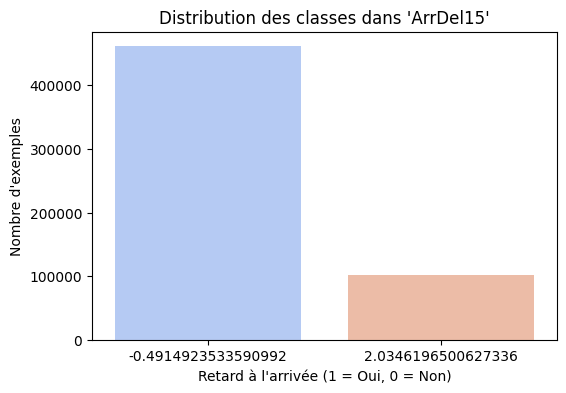

In [20]:
# Affichage de la distribution de la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x=df['ArrDel15'], palette='coolwarm')
plt.title("Distribution des classes dans 'ArrDel15'")
plt.xlabel("Retard à l'arrivée (1 = Oui, 0 = Non)")
plt.ylabel("Nombre d'exemples")
plt.show()


In [21]:
# Transformation de la variable cible ArrDel15 en binaire (0 ou 1) 
df['ArrDel15'] = (df['ArrDel15'] > 0).astype(int)  

# Définition des features et de la variable cible
X = df.drop(columns=['ArrDel15']) 
y = df['ArrDel15']

# Définition du sur-échantillonneur
oversampler = RandomOverSampler(random_state=42)

# Application du sur-échantillonnage dans la classe 1 
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Vérification de la nouvelle distribution des classes
print(y_resampled.value_counts(normalize=True) * 100)


ArrDel15
0    50.0
1    50.0
Name: proportion, dtype: float64


In [ ]:
#calculer les corrélations de la variable cible ArrDel15
correlations = df.corr(numeric_only=True)['ArrDel15'].sort_values(ascending=False)
print(correlations)


In [63]:
# Sélectionner uniquement les colonnes numériques (exclure les strings)
df_numeric = df.select_dtypes(include=['number'])

In [64]:
# Calculer la matrice de corrélation sur les variables numériques uniquement
correlations = df_numeric.corr()['ArrDel15'].dropna()
# Définition du seuil de la sélection de corrélation
threshold = 0.3
selected_features = correlations[abs(correlations) > threshold].index.tolist()

# Filtrage des colonnes pertinentes
correlations = df.corr()['ArrDel15'].dropna()
selected_features = correlations[abs(correlations) > threshold].index.tolist()

# Suppression de la variable cible pour éviter le leakage
selected_features.remove('ArrDel15')

# Affichage des features sélectionnées
print("Features sélectionnées :", selected_features)


Features sélectionnées : ['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrivalDelayGroups']


In [65]:
# Définition des features (X) et de la variable cible (y)
X = df[selected_features]  # On utilise uniquement les variables continues sélectionnées
y = df['ArrDel15']  # Variable cible (prédiction du retard)

# Division des données : 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification de la taille des ensembles
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


Taille du jeu d'entraînement : (450989, 7)
Taille du jeu de test : (112748, 7)


### Partie II Réduction de dimension ou Sélection de dimensions

In [ ]:

# Définition des deux pipelines 
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_select = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

#  Liste pour stocker les résultats 
results = {
    "Méthode": [],
    "Accuracy": [],
    "Nb_variables": []
}

In [ ]:
# Entraînement pipeline PCA 
pipeline_pca.fit(X_train, y_train)
y_pred_pca = pipeline_pca.predict(X_test)
acc_pca = accuracy_score(y_test, y_pred_pca)
n_components = pipeline_pca.named_steps['pca'].n_components_

results["Méthode"].append("PCA")
results["Accuracy"].append(acc_pca)
results["Nb_variables"].append(n_components)



In [ ]:
# Entraînement pipeline SelectFromModel
pipeline_select.fit(X_train, y_train)
y_pred_select = pipeline_select.predict(X_test)
acc_select = accuracy_score(y_test, y_pred_select)
selected_features = np.sum(pipeline_select.named_steps['select'].get_support())

results["Méthode"].append("SelectFromModel")
results["Accuracy"].append(acc_select)
results["Nb_variables"].append(selected_features)

In [ ]:
# Graphique de comparaison PCA et SelectFromModel
fig, ax1 = plt.subplots(figsize=(8, 5))

# Barres pour l'accuracy
ax1.bar(results["Méthode"], results["Accuracy"], color='skyblue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.set_title('Comparaison PCA vs SelectFromModel')

# Ajouter le nombre de variables au-dessus des barres
for i, (acc, n_var) in enumerate(zip(results["Accuracy"], results["Nb_variables"])):
    ax1.text(i, acc + 0.02, f"{n_var} vars", ha='center', fontsize=10)

plt.show()

###  Partie III Trois modèles de classification 

### Partie IV Evaluation des modèles via les métriques de validation

### Partie V Interface utilisateur